In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
from SpreadPy import IOUtils
from SpreadPy import AnalyticalUtils

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
io = IOUtils()

folder = 'toy_data/mental_lexicon_2/'
g_multiplex, layer_names = io.read_example_mental_lexicon(folder)

In [29]:
layer_names

['FreeAssociations', 'PhonSimilarities']

In [30]:
'N', g_multiplex.number_of_nodes(), 'E', g_multiplex.number_of_edges()

('N', 17039, 'E', 72588)

In [31]:
utils = AnalyticalUtils(g_multiplex)

In [32]:
lvc_nodes = utils.lvc(layer_names)
len(lvc_nodes)

4118

In [33]:
to_rem = list(set(g_multiplex.nodes())^set(lvc_nodes))
g_multiplex.remove_nodes_from(to_rem)

In [34]:
'N', g_multiplex.number_of_nodes(), 'E', g_multiplex.number_of_edges()

('N', 4118, 'E', 26229)

In [9]:
#g_sem = utils.graph_for_layers(layer_names=['free_associations', 'hierarchies', 'synonyms'])
g_sem = utils.graph_for_layers(layer_names=['FreeAssociations'])

In [10]:
'N', g_sem.number_of_nodes(), 'E', g_sem.number_of_edges()

('N', 4118, 'E', 10567)

In [11]:
#g_phon = utils.graph_for_layers(layer_names=['phonology'])
g_phon = utils.graph_for_layers(layer_names=['PhonSimilarities'])

In [12]:
'N', g_phon.number_of_nodes(), 'E', g_phon.number_of_edges()

('N', 4118, 'E', 15876)

In [13]:
# JUST ONCE

#node_to_conformity = utils.node_conformity(
#    alphas=[2],
#    attribute=['length_bin'],
#    profile_size=1,
#    savefile='toy_data/mental_lexicon_2/res/length_conformity.txt'
#)

In [14]:
conformity_file_length = 'toy_data/mental_lexicon_2/res/length_conformity.txt'

utils.word_features_pipeline(binned=True, conformity=[conformity_file_length])

In [15]:
g_multiplex.nodes[('mom')]

{'length': 3,
 'length_bin': 0,
 'polysemy': 1,
 'polysemy_bin': 0,
 'length_bin_conformity': 0.3822795631075776}

In [16]:
#L_sem = utils.laplacian_for_layers(layer_names=['free_associations', 'hierarchies', 'synonyms'])
#L_phon = utils.laplacian_for_layers(layer_names=['phonology'])
L_sem = utils.laplacian_for_layers(layer_names=['FreeAssociations'])
L_phon = utils.laplacian_for_layers(layer_names=['PhonSimilarities'])

L_sem_phon = utils.average_laplacian(L_sem, L_phon)

In [17]:
L_sem

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 5]], dtype=int32)

In [18]:
L_phon

array([[ 3,  0,  0, ...,  0,  0,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  8,  0,  0],
       [ 0,  0,  0, ...,  0, 17, -1],
       [ 0,  0,  0, ...,  0, -1,  8]], dtype=int32)

In [19]:
L_sem_phon

array([[ 4. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  3.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  2. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  5.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  9. , -0.5],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  6.5]])

In [20]:
lambda2_sem = utils.compute_second_smallest_eigenvalue(L_sem)
lambda2_sem

0.14730835

In [21]:
lambda2_phon = utils.compute_second_smallest_eigenvalue(L_phon)
lambda2_phon

0.0033466744

In [22]:
lambda2_sem_phon = utils.compute_second_smallest_eigenvalue(L_sem_phon)
lambda2_sem_phon

0.47621968

In [23]:
Dx = [.05, .1, .2, .5, 1, 2, 3, 4, 5, 10]

In [24]:
SL = []
lambda2_sl = []
for d in Dx:
    sl = utils.supralaplacian(L_sem, L_phon, dx=d)
    SL.append(sl)
    
    lambda2_sl.append(utils.compute_second_smallest_eigenvalue(sl))

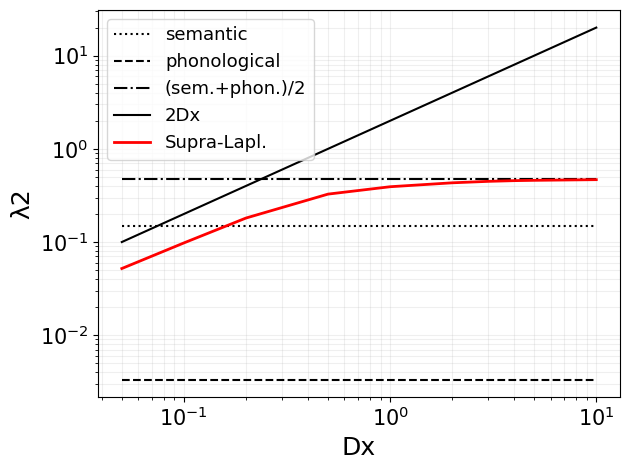

In [25]:
plt.plot(Dx, [lambda2_sem]*len(Dx), label='semantic', ls='dotted', color='k') # constant
plt.plot(Dx, [lambda2_phon]*len(Dx), label='phonological', ls='dashed', color='k') # constant
plt.plot(Dx, [lambda2_sem_phon]*len(Dx), label='(sem.+phon.)/2', ls='dashdot', color='k') # constant
plt.plot(Dx, [2*el for el in Dx], label='2Dx', color='k')
plt.plot(Dx, lambda2_sl, label='Supra-Lapl.', color='red', lw=2)
plt.loglog()
plt.legend(fontsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Dx', fontsize=18)
plt.ylabel('λ2', fontsize=18)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()